### 평균 이동(Mean Shift)

#### 평균 이동 개요

- **평균 이동**은 k-means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다.

- k-means가 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.

- 평균 이동 군집화는 **데이터의 분포도**를 이용해 군집 중심점을 찾는다.

  - 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수를 이용한다.

  - 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용한다.

  - 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리값을 KDE 함수값으로 입력한 뒤 그 반환값을 현재 위치에서 업데이트하며 이동하는 방식을 취한다.

  - 이런 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.
  

#### KDE(Kernel Density Estimation)

- 커널(kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.

- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다.

  - 확률 밀도 함수 PDF(Probability Density Function)은 확률 변수의 분포를 나타내는 함수로, 정규분포 함수를 포함해 감마 분포, t-분포 등이 있다.

  - 이를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있다.

- 대표적인 커널 함수로서 '가우시안 분포 함수'가 사용된다.

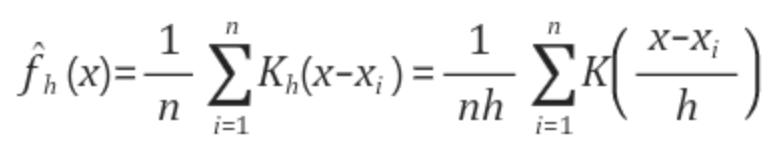

- K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭

- **대역폭 h**는 KDE 형태를 부드러운 형태로 평활화(smoothing)하는 데 적용되며, h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.

  - h값이 작으면(좌상단, h=1) 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉽다.

  - h값이 매우 크면(우하단, h=10) 과도하게 smoothing된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하므로 과소적합하기 쉽다.

  - 적절한 h값을 계산하는 것은 **KDE 기반 평균 이동 군집화**에서 매우 중요하다.

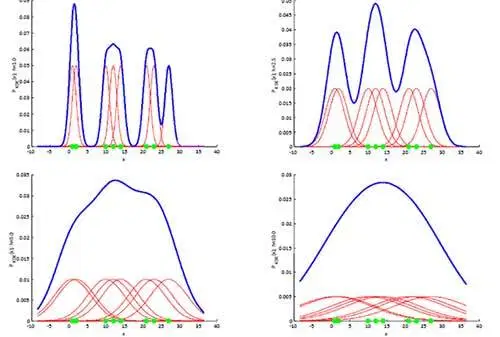

- 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지고 대역폭이 작을수록 많은 수의 군집 중심점을 가진다.

- 평균 이동 군집화는 군집 개수를 지정하지 않으며, 오직 대역폭 h의 크기에 따라 군집화를 수행한다.

- 사이킷런의 MeanShift 클래스

  - bandwidth: 가장 중요한 파라미터, 이는 KDE의 대역폭 h와 동일

  - estimate_bandwidth(): 최적의 대역폭 계산을 해주는 함수

In [1]:
#make_blobs()의 cluster_std=0.7로 정한 3개 군집의 데이터에 대해 bandwidth=0.8로 설정한 평균 이동 군집화 알고리즘
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 6개로, 지나치게 세분화되어 군집화됐다.

이번에는 bandwidth를 살짝 높여서 1로 설정해보자

In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집으로 잘 군집화되었다.

In [3]:
#estimate_bandwidth로 최적 bandwidth 찾기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth값:', round(bandwidth, 3))

bandwidth값: 1.816


In [4]:
#최적 bandwidth값 적용하여 동일한 make_blobs 데이터셋에 군집화 수행하기
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


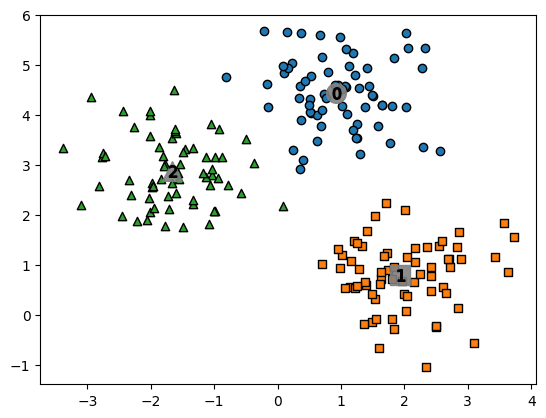

In [5]:
#구성된 3개의 군집 시각화
import matplotlib.pyplot as plt

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = cluster_df[cluster_df['meanshift_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label )

plt.show()

In [7]:
#타겟값과 군집 label값 비교
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점은 데아터셋의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다는 점이다.

- 또, 이상치의 영향력도 크지 않으며, 미리 군집 개수를 정할 필요도 없다.

- 하지만, 알고리즘의 수행 시간이 오래 걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.

- 이러한 특징 때문에 평균 이동 군집화 기법은 분석 업무 기반의 데이터셋보다 컴퓨터 비전 영역에서 더 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 한다.